# Сборный проект

Интернет-магазин продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation).

Цель исследования - выявить определяющие успешность игры закономерности.

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

Ход исследования:

 * Обзор данных
 * Предобработка данных
 * Исследовательский анализ данных
 * Составления портрета пользователя каждого региона
 * Проверка гипотез
 * Общий вывод

## Обзор данных

Составим первое представление о данных с помощью средств pandas. Так же в ходе работы нам потребуются средства библиотек matplotlib, seaborn, numpy и scipy. Импортируем их тоже.

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

Выгрузим данные из csv файла

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/games.csv')

Посмотрим первые 10 строк таблицы

In [3]:
# получение первых 10 строк датафрейма
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Уже по первым 10 строкам видно, что колонки имеют неудобные названия. Так же заметны пропуски в ряде столбцов.

Продолжим изучать данные. Посмотрим общую информацию о таблице

In [4]:
# получение общей информации о датафрейме методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Опишем, что известно об этой таблице, что необходимо будет учесть при предобработке данных. 

У нас есть описание данных:
   * Name — название игры
   * Platform — платформа
   * Year_of_Release — год выпуска
   * Genre — жанр игры
   * NA_sales — продажи в Северной Америке (миллионы проданных копий)
   * EU_sales — продажи в Европе (миллионы проданных копий)
   * JP_sales — продажи в Японии (миллионы проданных копий)
   * Other_sales — продажи в других странах (миллионы проданных копий)
   * Critic_Score — оценка критиков (максимум 100)
   * User_Score — оценка пользователей (максимум 10)
   * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<div style="border:solid blue 2px; padding: 20px">

**Выводы**
    
Итак, для дальнейшей работы с данными необходимо устранить ошибки:
    
 * Привести названия столбцов к нижнему регистру (для всех столбцов)
 * Обработать пропуски (название игры, жанр, дата релиза, рейтинг, оценка пользователя, оценка критика)
 * Изменить типы данных (год выхода - int, оценка критиков - int, оценка пользователей - float)

## Предобработка данных

### Названия столбцов

Выведем на экран названия колонок

In [5]:
#названия колонок в датафрейме
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведём для удобства названия столбцов к нижнему регистру

In [6]:
# применение функции lower() к названиям строк датафрейма
df.columns = [x.lower() for x in df.columns]

Проверим, что названия колонок изменились

In [7]:
# просмотр датафрейма
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь все колонки интуитивно понятно называются

### Обработка пропусков

Посчитаем, сколько в таблице пропущенных значений

In [8]:
# подсчёт пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Итак, пропуски присутствуют в шести столбцах. 
* Очень странно, что в двух строках пропущено название игры. Нужно отдельно посмотреть, что это за строки и, вероятно исключить их из датафрейма. Возможно, данные затерялись.
* Аналогично с пропусками в столбце genre.
* Со столбцом с годом релиза игры не понятно, откуда взять эти данные. Заполнять их медианой или средним было бы некорректно. Лучше оставить пропуски.
* Практически половина данных отсутствует по столбцам critic_score, rating и user_score. Возможно, не для всех игр была возможность выставления оценок (например, для старых игр ещё не придумали, что их можно оценивать) и рейтинга. Эти пропуски тоже лучше оставить как есть

#### Столбец name

Посмотрим, для каких строк пропущено название игры. Для этого возьмём срез, для которого  name != name, поскольку такое неравенство верно только для nan.

In [9]:
# срез датафрейма, в котором значение в столбце name не равно себе же
df.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Итак, мы видим, что у  игр с пропусками в имени жанр тоже пропущен. Удалим из датафрейма эти строки. 

In [10]:
# удаление строк с пропусками в 'name'
df.dropna(subset = ['name'], inplace = True)

Проверим, что строки действительно удалены

In [11]:
# подсчёт пропусков в столбце genre
df['genre'].isna().sum()

0

Итак, пропуски обработаны

### Изменение типов данных

#### Столбец year_of_release

Из-за наличия пропусков, тип данных которых float, остальные данные в столбце тоже стали типа float. Изменим тип данных, не являющихся nan на int

In [12]:
# приведение данных в столбце year_of_release к типу int
df['year_of_release'] = df['year_of_release'].fillna(-1)
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'] = df['year_of_release'].replace(-1, np.nan)

#### Столбец critic_score

Из-за наличия пропусков, тип данных которых float, остальные данные в столбце тоже стали типа float. Изменим тип данных, не являющихся nan на int

In [12]:
# приведение данных в столбце critic_score к типу int
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='ignore')

#### Столбец user_score

Тип данных в столбце object, что странно. Посмотрим на значения в этом столбце, чтобы понять, за счёт чего такой неожиданный тип данных.

In [13]:
# вывод уникальных значений столбца user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим странное значение tbd. Видимо из-за него тип данных object. Посмотрим, как часто такое встречается

In [14]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Довольно часто. Значит, нужно разобраться, что это значит.

Из открытых интернет-источников удалось узнать, что в гейм индустрии tbd может означать To Be Determined, то есть "Будет определено". Значит, пользователь не может сообщить точный рейтинг. Заполним его пропуском, чтобы оно не мешало в дальнейшем исследовании

In [15]:
# замена значения tbd на пропуск
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Теперь можно изменить тип данных

In [16]:
# изменение типа данных в столбце user_score на float
df['user_score'] = df['user_score'].astype(float)

#### Столбец rating

Тип данных этого столбца менять не будем. Посмотрим, какие значения там встречаются и как переводится каждое из них.

In [17]:
# просмотр уникальных значений столбца rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Изз открытых интернет источников удалось понять, что обозначает каждое сокращение

Entertainment Software Rating Board (ESRB)
* «EC» («Early childhood») — «Для детей младшего возраста»: 
* «E» («Everyone») — «Для всех»:
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: 
* «T» («Teen») — «Подросткам»:
* «M» («Mature») — «Для взрослых»:
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»:
* «K-A» («Kids to Adults») - «Для детей и взрослых»

### Продажи во  всех регионах

Для дальнейшего исследования нам понадобятся суммарные продажи во всех регионах для каждой игры. Посчитаем их и создадим для них отдельный столбец.

Реализуем функцию, которая будет считать продажу по всем регионам

In [18]:
def all_regions_sales_count(row):
    '''
    Функция принимает на вход строку. Записывает в отдельные переменные значения продаж в каждом из представленных регионов
    и возвращает их сумму.
    '''
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    return na_sales + eu_sales + jp_sales + other_sales

Добавим новый столбец, в который поместим значение - продажи по всем регионам (миллионы проданных копий)

In [19]:
# применение функции all_regions_sales_count к новому столбцу all_regions_sales
df['all_regions_sales'] = df.apply(all_regions_sales_count, axis=1)

Проверим, что столбец добавлен

In [20]:
# просмотр датафрейма
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Да, видим, что столбец с суммарными продажами добавлен  в таблицу

<div style="border:solid blue 2px; padding: 20px">

**Выводы**
    
На этапе предобработки данных мы:
 * привели названия столбцов к нижнему регистру
 * удалили две строки датафрейма с пропусками в имени и жанре
 * предположили причины появления пропусков в столбцах с годом релиза, оценкой пользователей, оценкой критиков и рейтингом. Однако заполнять эти пропуска не стали
 * привели данные к нужным типам
 * разобрались со встречающейся аббревиатурой tbd 
 * добавили новый стобец с продажами по всем регионам

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

<AxesSubplot:>

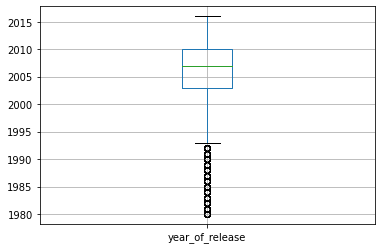

In [21]:
# боксплот для толбца year_of_release
df.boxplot('year_of_release')

Мы видим, что большинство значений расположены в промежутке от 1993 до 2016 года.

Построим гистограмму для этих данных

<AxesSubplot:>

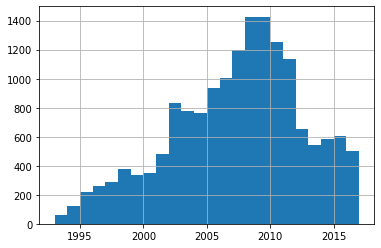

In [22]:
# гистограмма для среза столбца year_of_release с 1993 до 2016 года
df['year_of_release'].hist(bins=2017-1993, range=(1993, 2017))

Отметим, что для исследования нам не важны данные за весь период. Нужно смотреть только на недавние продажи.

Отметим, что до 2003 года игр выпускалось совсем не много, основная масса новых игр приходится на 2006-2012 годы. Дальше игр выпускается всё меньше.
Пик значений находится выше 1400

### Продажи по платформам

Выберем платформы с наибольшими суммарными продажами и построем распределение по годам.

Ответим на вопрос:
 * За какой характерный срок появляются новые и исчезают старые платформы?

In [23]:
# сгруппируем датафрейм по платформам и выведем суммарные продажи для каждой платформы
df.groupby('platform')['all_regions_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_regions_sales, dtype: float64

Возьмём в список для исследования, например, первые 10 платформ с наибольшими продажами

In [24]:
# положим в top_platforms срез датафрейма по 10 платформам с наибольшими суммарными продажами
top_platforms = df.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]')

In [25]:
top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


Построим для этих платформ распределение по годам

In [38]:
def draw_plot(col, label_p):
    '''
    Функция построения гистограммы
    '''
    a = col.plot(kind='hist',bins=2017-1993, figsize=(16,5), alpha=0.3, label=label_p)
    a.legend()
    return a


In [39]:
# список платформ с наибольшими продажами
top_platform_list = ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]

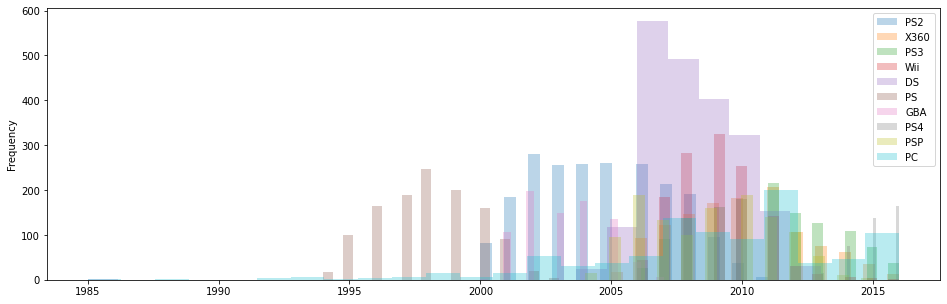

In [40]:
# применение функции построения гистограмм к срезу датафрейма по топовым платформам
for platform_from_top in top_platform_list:
    draw_plot(top_platforms[top_platforms['platform'] == platform_from_top]['year_of_release'], str(platform_from_top))


Ответим на вопрос, за какой характерный срок появляются новые и исчезают старые платформы

Для каждой из наиболее прибыльных платформ посмотрим год первого релиза и год последнего. Вычтем из второго первый и возьмём среднее по всем получившимся значениям.

In [41]:
#инициализируем переменные - максимальный год - список из нулей, минимальный - список из заведомо больших значений
max_year = [0] * len(top_platform_list)
min_year = [3000] * len(top_platform_list)

Заполним списки

In [42]:
for i in range(len(top_platform_list)):
    for year in top_platforms[top_platforms['platform'] == top_platform_list[i]]['year_of_release']:
        if year > max_year[i]:
            max_year[i] = year
        if year < min_year[i]:
            min_year[i] = year

Посмотрим на получившиеся списки

In [43]:
max_year

[2011.0,
 2016.0,
 2016.0,
 2016.0,
 2013.0,
 2003.0,
 2007.0,
 2016.0,
 2015.0,
 2016.0]

In [44]:
min_year

[2000.0,
 2005.0,
 2006.0,
 2006.0,
 1985.0,
 1994.0,
 2000.0,
 2013.0,
 2004.0,
 1985.0]

In [45]:
platform_life_count = []
for i in range(len(top_platform_list)):
    platform_life_count.append(max_year[i] - min_year[i])

In [46]:
platform_life_count

[11.0, 11.0, 10.0, 10.0, 28.0, 9.0, 7.0, 3.0, 11.0, 31.0]

Мы видим в списке два выбивающихся значения. Удалим их из списка прежде чем считать среднее.

In [47]:
# удаление из списка по индексу
platform_life_count.pop(-1)

31.0

In [48]:
# удаление из списка по индексу
platform_life_count.pop(4)

28.0

Теперь посчитаем среднее без учёта выбивающихся значений

In [49]:
# сумма значений списка поделить на его длину
sum(platform_life_count) / len(platform_life_count)

9.0

Итак, мы видим, что в среднем платформы живут 9 лет

### Актуальный период

Выберем актуальный период так, чтобы это помогло построить прогноз на 2017 год. И не будем учитывать в исследовании данные за предыдущие годы.

Исходя из предыдущего анализа, в среднем живут платформы живут 9 лет, однако платформы часто обновляются и брать такой большой актуальный период не стоит. К тому же популярны платформы не на протяжении всего этого срока. Возьмём актуальный период 3 года.

In [50]:
# новый датафрейм с информацией по актуальному периоду
df_new = df.query('year_of_release > 2013')

In [51]:
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Потенциально прибыльные платформы

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Посмотрим на скаттерплот по продажам по платформам за каждый год

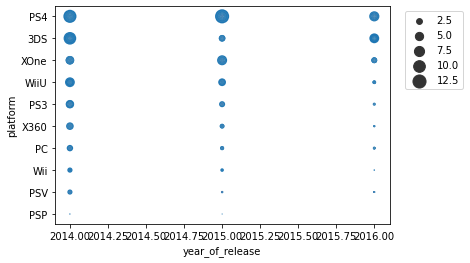

In [60]:
scatter = sns.scatterplot(x="year_of_release", y="platform",size="all_regions_sales",data=df_new,sizes=(0, 200), legend="brief")
scatter.legend(bbox_to_anchor= (1.03, 1))

Отсюда видны потенциально прибыльные платформы:
 * PS4
 * 3DS
 * XOne

Переформируем данные для удобства построения графиков

In [61]:
df_actual_pivot = df_new.pivot_table(index=['platform', 'year_of_release'], values=['all_regions_sales'], aggfunc=['sum'])
df_actual_pivot = df_actual_pivot.reset_index(level='year_of_release')
df_actual_pivot.columns = ['year', 'all_regions_sales_sum']

In [62]:
df_actual_pivot

,year,all_regions_sales_sum
platform,,
3DS,2014.0,43.76
3DS,2015.0,27.78
3DS,2016.0,15.14
PC,2014.0,13.28
PC,2015.0,8.52
PC,2016.0,5.25
PS3,2014.0,47.76
PS3,2015.0,16.82
PS3,2016.0,3.60


In [63]:
df_actual_pivot = df_actual_pivot.reset_index()
df_actual_pivot = df_actual_pivot.pivot(index='year', columns='platform', values='all_regions_sales_sum')

In [64]:
df_actual_pivot

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year,,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Рассмотрим сначала боксплот с общей выручкой

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Выручка, млн дол.')

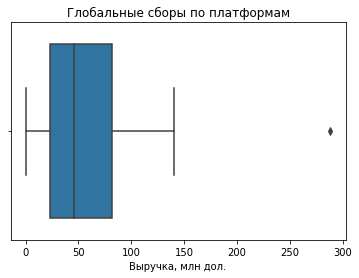

In [65]:
p = df_new.groupby('platform')['all_regions_sales'].sum().reset_index()
ax = sns.boxplot('all_regions_sales', data=p)
ax.set_title('Глобальные сборы по платформам')
ax.set_xlabel('Выручка, млн дол.')

Основная часть значений находится в промежутке от 25 до 75. Видим так же хвост из больших значений.

Теперь составим боксплоты

<AxesSubplot:title={'center':'Распределение выручки по платформам'}, xlabel='Платформа', ylabel='Выручка'>

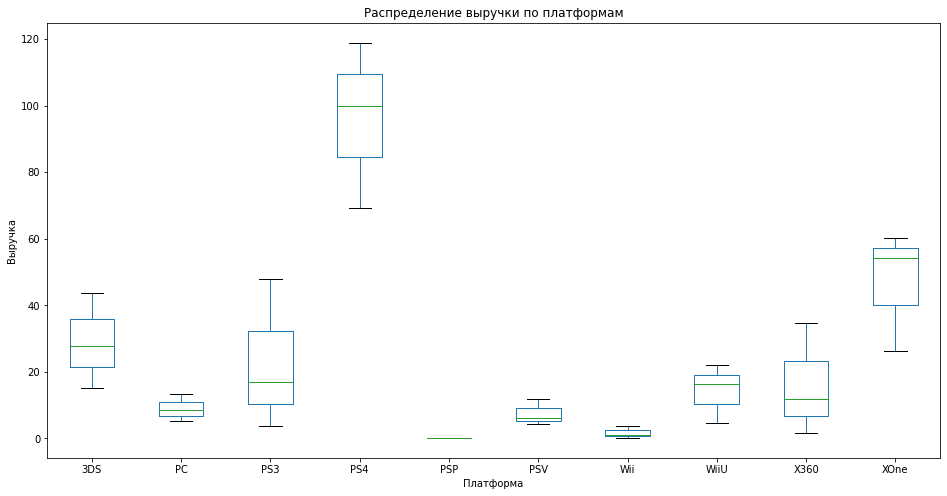

In [66]:
fig, ax = plt.pyplot.subplots(1)
ax.set_title('Распределение выручки по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Выручка')
df_actual_pivot.plot(kind='box', figsize=(16,8), ax=ax)

Видно, что по продажам платформы сильно отличаются друг от друга. Видим, что PS4 заметно выделяется на фоне остальных. Далее идут XOne и 3DS - именно те платформы, которые являются наиболее перспективными

### Влияние отзывов пользователей и критиков на продажу 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Возьмем за основу данные по PS3, как популярной платформы с длинным временем жизни

In [67]:
# срез датафрейма, для платформы PS3
df_ps3 = df_new.query('platform == "PS3"')

Построим диаграммы рассеяния

Text(0.5, 0, 'Оценка пользователей')

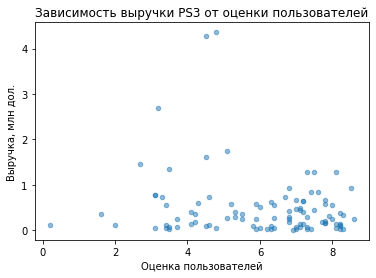

In [68]:
df_ps3.plot(y='all_regions_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS3 от оценки пользователей')
ax = plt.pyplot.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

Text(0.5, 0, 'Оценка критиков')

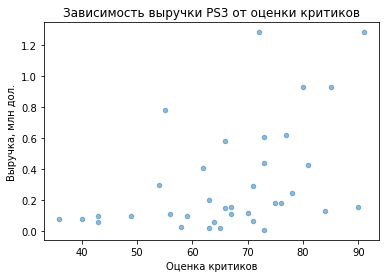

In [69]:
df_ps3.plot(y='all_regions_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS3 от оценки критиков')
ax = plt.pyplot.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [70]:
# Посчитаем корреляцию между отзывами и продажами
df_ps3[['user_score', 'critic_score', 'all_regions_sales']].corr()

,user_score,critic_score,all_regions_sales
user_score,1.000000,0.693445,-0.166761
critic_score,0.693445,1.000000,0.446575
all_regions_sales,-0.166761,0.446575,1.000000


И по графикам, и по значению корреляции видим, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей. Больше всего выручка при оценке критиков выше 80.

Соотнесём выводы с продажами игр на других платформах.

Text(0.5, 0, 'Оценка пользователей')

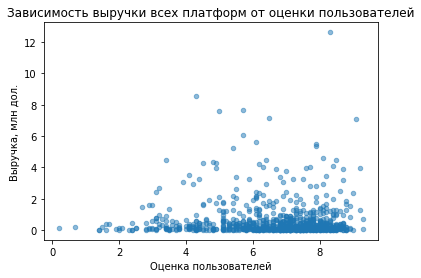

In [71]:
df_new.plot(y='all_regions_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки пользователей')
ax = plt.pyplot.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

Text(0.5, 0, 'Оценка критиков')

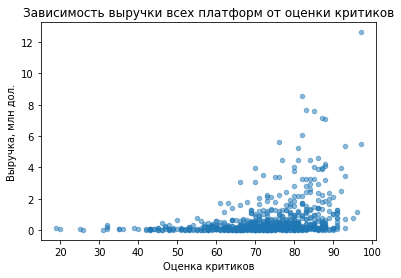

In [72]:
df_new.plot(y='all_regions_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки критиков')
ax = plt.pyplot.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [73]:
# Посчитаем корреляцию между отзывами и продажами
df_new[['user_score', 'critic_score', 'all_regions_sales']].corr()

,user_score,critic_score,all_regions_sales
user_score,1.00000,0.504460,-0.013070
critic_score,0.50446,1.000000,0.328105
all_regions_sales,-0.01307,0.328105,1.000000


Мы видим, что корреляция для всех платформ ещё ниже.

Итак, в целом, можно сказать, что оценки критиков влияют на продажи сильнее (чем выше оценка критиков, тем больше продажи), чем оценки пользователей. Однако, это в основном относится к высоким оценкам. Можно отметить, что пользовательские оценки часто являются не объективными, поэтому почти не влияют на продажи игр. 

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим скаттерплот, который покажет в среднем, игры каких жанров приносят платформам наибольшую выручку

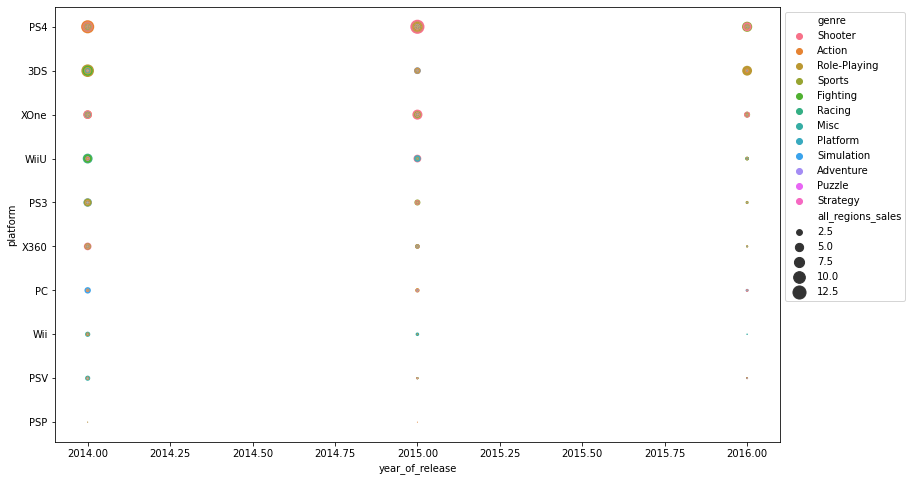

In [81]:
fig, scatter = plt.pyplot.subplots(figsize = (13,8))
scatter = sns.scatterplot(x="year_of_release", y="platform",hue="genre",size="all_regions_sales",data=df_new,sizes=(0, 200))
scatter.legend(bbox_to_anchor= (1, 1))

Оценим, какая выручка с каждого жанра, если смотреть на все платформы вместе

In [82]:
df_new.groupby('genre')['all_regions_sales'].sum().sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: all_regions_sales, dtype: float64

Наиболее прибыльные жанры - Action, Shooter и Sports. Жанры с низкими продажами - Strategy и Puzzle

Однако, сумма не лучший показатель, поскольку игр разных жанров выпущено разное количество. 

Text(0, 0.5, 'Количество выпущенных игр')

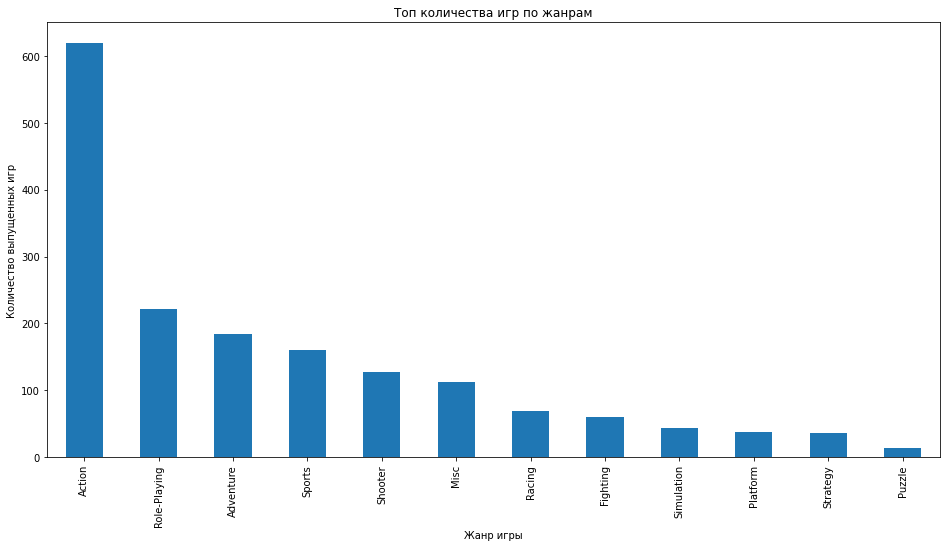

In [83]:
# Построим график для наглядности

ax = df_new['genre'].value_counts().plot(kind='bar', figsize=(16,8))
ax.set_title('Топ количества игр по жанрам')
ax.set_xlabel('Жанр игры')
ax.set_ylabel('Количество выпущенных игр')

Посмотрим на среднее

In [84]:
df_new.groupby('genre')['all_regions_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: all_regions_sales, dtype: float64

Здесь уже наиболее прибыльными оказываются - Shooter, Platform и Sports, а наименее прибыльными - Puzzle, Strategy и Adventurе

Визуализируем продажи по жанрам

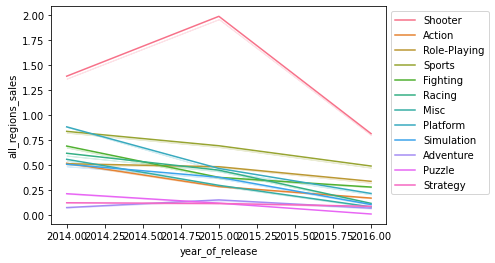

In [85]:
ax = sns.lineplot(y='all_regions_sales', x='year_of_release', hue='genre', markers=True, ci=False, data = df_new)
ax.legend(bbox_to_anchor= (1, 1))

<div style="border:solid blue 2px; padding: 20px">

**Выводы**
    
На этапе исследовательского анализа данных мы смогли отметить следующее:
    
 * В разные годы количество выпускаемых игр имело довольно большой разброс - до 2003 года игр выпускалось мало, активный рост был в 2006-2012 годах, а далее снова спад
 * Средний срок жизни платформы - 9 лет
 * Потенциально прибыльные платформы - PS4, 3DS, XOne
 * Отзывы критиков и отзывы пользователей слабо влияют на продажи, но влияние первых заметно большей влияния последних. Больше всего выручка при оценке критиков выше 80.
 * Если судить по общей выручке, то наиболее прибыльные жанры - Action, Shooter и Sports, а если смотреть на среднее, то больше прибыли приносят Shooter, Platform и Sports.
 * Жанры с низкими продажами, если смотреть на общую сумму - Strategy и Puzzle, а если на среднее, то к ним присоединятеся ещё и Adventurе

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP): 
 * Самые популярные платформы (топ-5).
 * Самые популярные жанры (топ-5). 

Ответим на вопрос: Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы по регионам

Для начала посмотрим по каждому региону платформы. Сгруппируем датафрейм по платформе и выведем пять с наибольшими продажами

#### Северная Америка

In [86]:
df_new.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


В Северной Америке топ-5 платформ - PS4, XOne, X360, 3DS, PS3.

#### Европа

In [90]:
df_new.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


В Европе топ-5 платформ - PS4, XOne, PS3, PC, 3DS

#### Япония

In [91]:
df_new.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


В Японии топ-5 платформ - 3DS, PS4, PSV, PS3, WiiU

#### Другие страны

In [92]:
df_new.groupby('platform')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5)

,platform,other_sales
3,PS4,44.48
9,XOne,12.52
2,PS3,9.37
8,X360,4.35
0,3DS,3.68


Среди других регионов топ-5 платформ - PS4, XOne, PS3, X360, 3DS

#### Различия в долях продаж

Опишем различия в долях продаж. Построим графики, отображающие какой процент приносит каждая платформа

In [93]:
# сводная таблица со всеми необхожимыми для графиков данными
df_table = df_new.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','all_regions_sales'], ['platform'], aggfunc='sum').sort_values(by='na_sales', ascending=False)

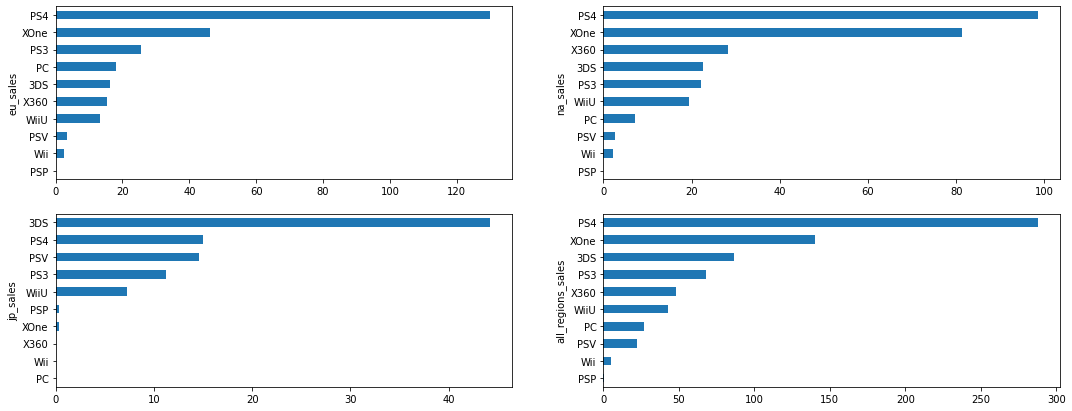

In [94]:
# построение графиков
fig, axis = plt.pyplot.subplots(2,2, figsize=(18,7))

df_table['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0]).set(ylabel='eu_sales');
df_table['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1]).set(ylabel='na_sales');
df_table['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0]).set(ylabel='jp_sales');
df_table['all_regions_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,1]).set(ylabel='all_regions_sales');

В целом видно, что 
 * в Европе сильно выделяется платформа PS4
 * в Северной Америке разумнее говорить о топ-2 платформах - PS4 и XOne
 * а в Японии сильно выделяется 3DS
 * В Японии отличается топ продаж от Европы, Америки и остальных стран

### Самые популярные жанры по регионам

Проведём анализ, такой же как с платформами. Сгруппируем датафрейм по жанру и выведем пять с наибольшими продажами

#### Северная Америка

In [95]:
df_new.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


Топ-5 жанров в Северной Америке - Action, Shooter, Sports, Misc, Role-Playing

#### Европа

In [96]:
df_new.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


Топ-5 жанров в Европе, почти как и в Америке, - Action, Shooter, Sports, Role-Playing и Racing

#### Япония

In [97]:
df_new.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


Топ-5 жанров в Японии - Role-Playing, Action, Fighting, Misc, Shooter

#### Другие страны

In [98]:
df_new.groupby('genre')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5)

,genre,other_sales
0,Action,22.57
8,Shooter,21.53
10,Sports,14.36
7,Role-Playing,8.64
3,Misc,4.03


Топ-5 жанров по другим регионам аналогичен топу в Европе и Америке - Action, Shooter, Sports, Misc, Role-Playing

Посмотрим на графики

In [99]:
# новая сводная таблица для построения графиков
df_table_2 = df_new.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','all_regions_sales'], ['genre'], aggfunc='sum').sort_values(by='na_sales', ascending=False)

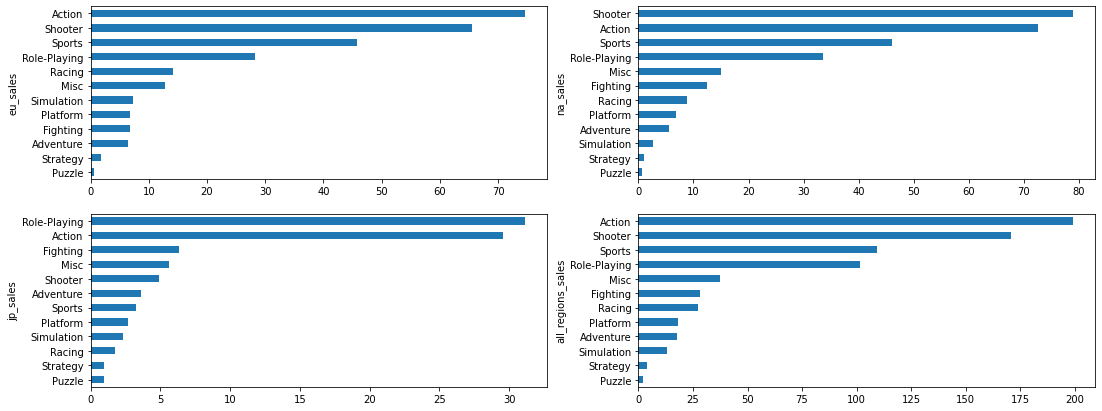

In [100]:
# построение графиков
fig, axis = plt.pyplot.subplots(2,2, figsize=(18,7))

df_table_2['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0]).set(ylabel='eu_sales');
df_table_2['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1]).set(ylabel='na_sales');
df_table_2['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0]).set(ylabel='jp_sales');
df_table_2['all_regions_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,1]).set(ylabel='all_regions_sales');

Если смотреть на графики, можно понять, что для Европы, Северной Америки и других регионов для топовых жанров они практически идентичны - сильно выделяются игры жанра Action, а за ними Shooter и Sports. А вот Япония выделяется. Там ролевые игры опережают все прочие

### Влияние рейтинга ESRB на продажи в регионах

Аналогично посмотрим, игры с каким рейтингом имеют большие продажи

#### Северная Америка

In [101]:
df_new.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)

,rating,na_sales
2,M,96.42
0,E,50.74
3,T,38.95
1,E10+,33.23


Лучше всего в Северной Америке продаются игры для всех и для взрослых

#### Европа

In [102]:
df_new.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)

,rating,eu_sales
2,M,93.44
0,E,58.06
3,T,34.07
1,E10+,26.16


По Европе аналогичные результаты - наибольшие продажи приносят игры для всех и для взрослых

#### Япония

In [103]:
df_new.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,rating,jp_sales
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


А вот в Японии популярны игры для подростков и так же для всех

#### Другие регионы

In [104]:
df_new.groupby('rating')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5)

,rating,other_sales
2,M,28.67
0,E,15.39
3,T,11.33
1,E10+,7.83


Результат для других регионов аналогичен результату для Европы и Америки - наибольшим успехом пользуютс игры для взрослых и для всех

Посмотрим на графики

In [105]:
# сводная таблица с необходимыми для графиков данными
df_table_3 = df_new.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','all_regions_sales'], ['rating'], aggfunc='sum').sort_values(by='na_sales', ascending=False)

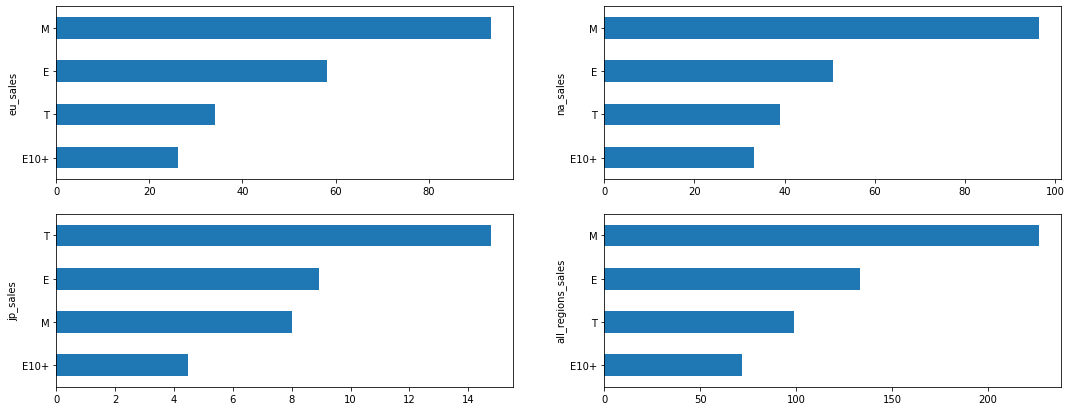

In [106]:
# графики
fig, axis = plt.pyplot.subplots(2,2, figsize=(18,7))

df_table_3['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0]).set(ylabel='eu_sales');
df_table_3['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1]).set(ylabel='na_sales');
df_table_3['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0]).set(ylabel='jp_sales');
df_table_3['all_regions_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,1]).set(ylabel='all_regions_sales');

Мы видим, что игры для всех и для взрослых во всех регионах, кроме Японии, наиболее популярны. В Японии же часто продаваемыми оказываются игры для подростков

<div style="border:solid blue 2px; padding: 20px">

**Выводы**
    
Составляя портрет пользователя каждого региона, мы получили:
 * В Европе, Северной Америке и других регионах (не Японии)
    * выделяются платформы - PS3, PS4, Xone
    * наиболее популярные жанры - Action, Shooter и Sports
    * особую популярность имеют игры для взрослых и для всех
    
 * В Японии же
    * в топ платформ вошли 3DS и PSV
    * в список наиболее популярных жанров первое место занимают ролевые игры
    * популярны игры для всех и подростковые

## Проверка гипотез

Проверим гипотезы
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * Средние пользовательские рейтинги жанров Action и Sports разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза - гипотеза об отсутствии различий. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

 * H0 - средние пользовательские рейтинги платформ Xbox One и PC равны 
 * H1 - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [107]:
#зададим критический уровень статистической значимости
alpha = .05

In [108]:
# сделаем срезы с необходимыми для анализа данными
x_one = df_new.query('platform == "XOne"')
pc = df_new.query('platform == "PC"')

Проверим гипотезу

In [109]:
results = st.ttest_ind(
    x_one['user_score'],
    pc['user_score'],
)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', x_one['user_score'].mean())
print('Cредний пользовательский рейтинг платформы PC -', pc['user_score'].mean())

Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.594545454545454
Cредний пользовательский рейтинг платформы PC - 6.298360655737704


Итак, средние пользовательские рейтинги платформ Xbox One и PC равны

### Средние пользовательские рейтинги жанров Action и Sports разные.

Аналогично предыдущему случаю сформулируем гипотезы, исходя из того, что  нулевая гипотеза формулируется через равенство

 * H0 - средние пользовательские рейтинги жанров Action и Sports равны
 * H1 - средние пользовательские рейтинги жанров Action и Sports не равны

In [110]:
# срезы данных, которые сравниваем
action = df_new.query('genre == "Action"')
sports = df_new.query('genre == "Sports"')

Проверим гипотезу

In [111]:
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг жанра Action -', action['user_score'].mean())
print('Cредний пользовательский рейтинг жанра Sports -', sports['user_score'].mean())

Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 6.760606060606061
Cредний пользовательский рейтинг жанра Sports - 5.225196850393701


Итак, средние пользовательские рейтинги жанров Action и Sports одинаковые

<div style="border:solid blue 2px; padding: 20px">

**Выводы**
    
В ходе проверки гипотез, мы выяснили, что
 * средние пользовательские рейтинги платформ Xbox One и PC примерно равны
 * средние пользовательские рейтинги жанров Action и Sports примерно одинаковые

## Общий вывод

В ходе работы над проектом мы
 * Предобработали данные: привели названия столбцов к нижнему регистру, преобразовали данные в нужные типы, разобрались, что делать с пропусками, посчитали суммарные продажи во всех регионах и добавили в датасет.
 * В процессе исследовательского анализа данных
    * поняли, что средний срок жизни платформы 9 лет и выбрали актуальный период с 2014 года
    * выделили три потенциально прибыльные платформы: PS4, 3DS, XOne
    * обнаружили, что оценки критиков влияют на продажи сильнее, чем оценки пользователей
    * отметили самые прибыльные жанры: Action, Shooter, Sports, Platform, а так же жанры с низкими продажами: Adventure, Puzzlles, Strategy
 * Отдельно исследовали, какие игры любят в разных регионах
    * В Северной Америке и Европе 
       * топ платформы: PS4, XOne, PS3
       * топ жанры: Action и Shooter
       * популярны игры для всех и для взрослых
    * В Японии
       * топ платформы: 3DS, PS4, PS3, PSV
       * топ жанры: Role-Playing, Action
       * популярны игры для всех и для подорстков
 * Проверили гипотезы и выяснили, что 
    * средние пользовательские рейтинги платформ Xbox One и PC примерно равны
    * средние пользовательские рейтинги жанров Action и Sports примерно одинаковые
    
    
Вывод:
 * Стоит обратить внимание на игры жанра Action, как одного из наиболее популярных везде
 * Рекламные компании для всех регионов кроме Японии могут быть схожи, поскольку предпочтения не очень разнятся
 * Имеет смысл уделить внимание платформам XOne и PS4